# **Estudo para Tarefa I**

# Análise Exploratória de Dados – Loja de Departamento (Base Sintética)

Este notebook simula uma análise exploratória para ajudar na realização da tarefa originalmente aplicada à base de nascimentos (SINASC).

---
## 🎯 Objetivo:
- Criar gráficos de barras de variáveis categóricas/discretas.
- Explorar a relação entre número de consultas ao site e avaliação do produto.
- Criar um painel visual com múltiplos gráficos.

---
## 📊 Variáveis da base:

| Variável            | Descrição                                              |
|---------------------|--------------------------------------------------------|
| AVALIACAO1          | Nota do cliente no momento da compra (0 a 10)          |
| AVALIACAO2          | Nota do cliente após o uso do produto (0 a 10)         |
| GENERO_CLIENTE      | 1 = Masculino, 2 = Feminino                            |
| CATEGORIA_PROD      | 1=Eletrônicos, 2=Roupas, 3=Alimentos, 4=Móveis, 5=Outros|
| ESTADO_CIVIL        | 1=Solteiro, 2=Casado, 3=Divorciado, 4=Viúvo            |
| N_CONSULTAS_SITE    | Número de visitas ao site antes da compra (0 a 10)     |


In [9]:
# -------------------------------------------
# Importação de bibliotecas
# -------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração estética
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)


In [10]:
# -------------------------------------------
# Geração da base de dados sintética
# -------------------------------------------

# Aqui vou simular uma base que na tarefa seria a base que carrega SINASC

np.random.seed(42)

n = 1000
df = pd.DataFrame({
    'AVALIACAO1': np.random.randint(0, 11, size=n),
    'AVALIACAO2': np.random.randint(0, 11, size=n),
    'GENERO_CLIENTE': np.random.choice([1, 2], size=n, p=[0.45, 0.55]),
    'CATEGORIA_PROD': np.random.choice([1, 2, 3, 4, 5], size=n),
    'ESTADO_CIVIL': np.random.choice([1, 2, 3, 4], size=n, p=[0.4, 0.4, 0.1, 0.1]),
    'N_CONSULTAS_SITE': np.random.poisson(3, size=n)
})

df.head()


,AVALIACAO1,AVALIACAO2,GENERO_CLIENTE,CATEGORIA_PROD,ESTADO_CIVIL,N_CONSULTAS_SITE
0,6,6,1,3,2,3
1,3,7,2,4,2,3
2,10,2,1,3,1,1
3,7,5,2,5,2,4
4,4,0,1,1,2,2


---
## 1. Gráficos de barras – Distribuição de variáveis individuais

Vamos analisar a distribuição das variáveis:
- AVALIACAO1
- AVALIACAO2
- GENERO_CLIENTE
- CATEGORIA_PROD
- ESTADO_CIVIL


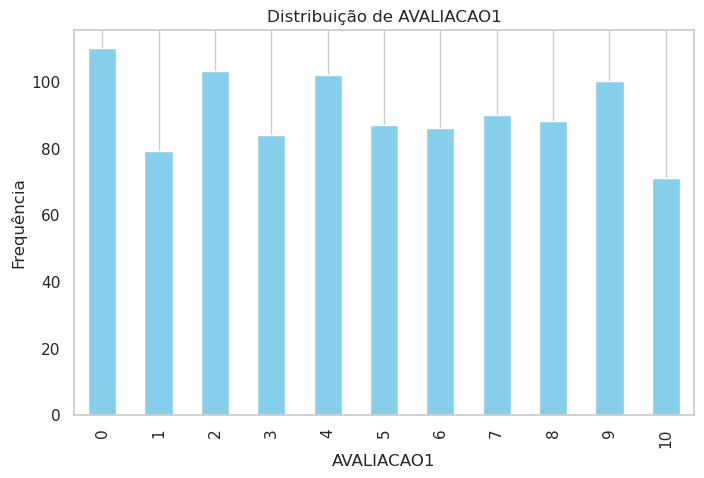

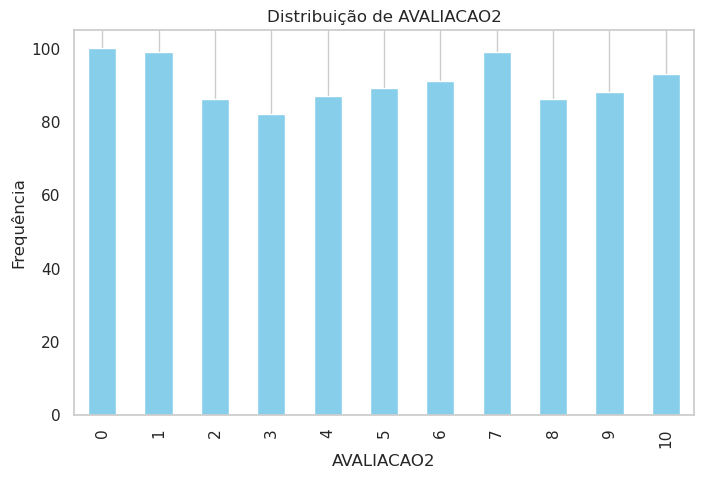

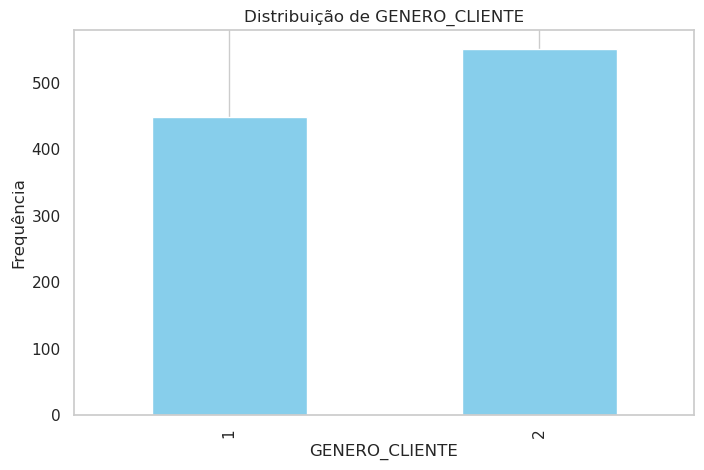

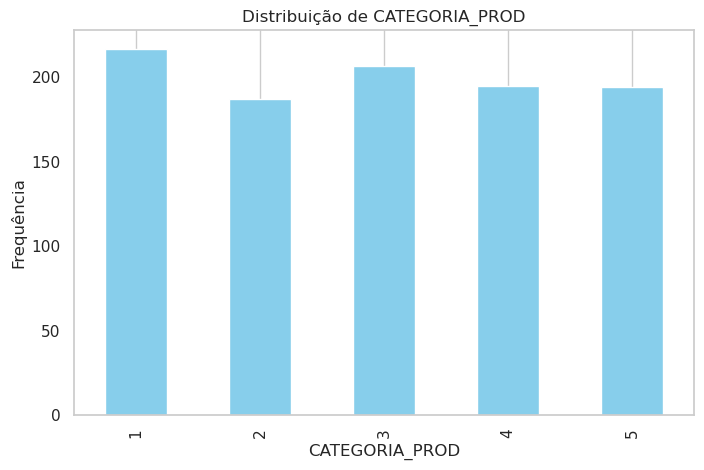

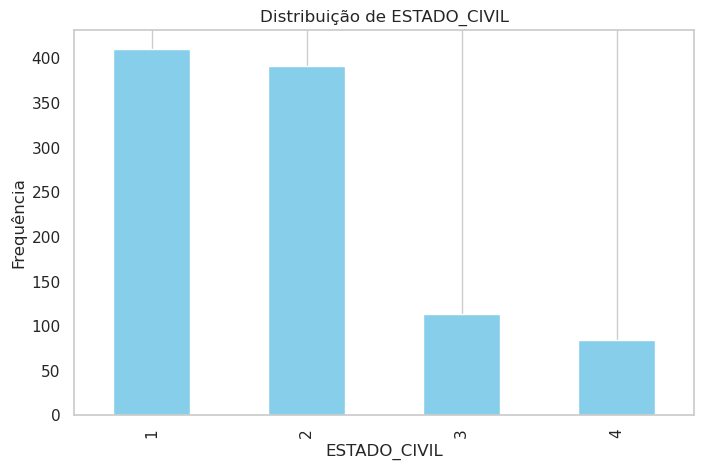

In [14]:
variaveis = ['AVALIACAO1', 'AVALIACAO2', 'GENERO_CLIENTE', 'CATEGORIA_PROD', 'ESTADO_CIVIL']

for col in variaveis:
    df[col].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.grid(axis='y')
    plt.show()

## Explicação

* O loop percorre cinco colunas do dataframe.

* value_counts() conta quantas vezes cada valor aparece.

* sort_index() garante que os valores apareçam em ordem numérica (por exemplo, de 0 a 10 nas notas).

* plot(kind='bar') cria o gráfico de barras.

* Cada gráfico mostra quantos registros têm determinado valor para aquela variável.

---
## 2. Média da AVALIACAO2 por N_CONSULTAS_SITE

Queremos entender se há relação entre o número de visitas ao site antes da compra e a satisfação do cliente após o uso do produto.


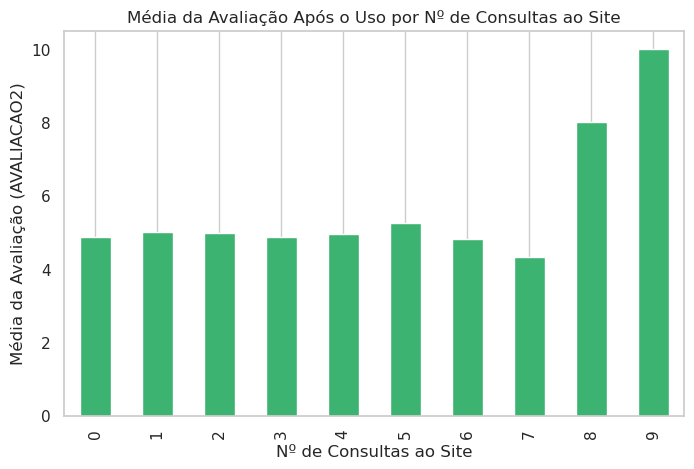

In [18]:
df.groupby('N_CONSULTAS_SITE')['AVALIACAO2'].mean().plot(kind='bar', color='mediumseagreen')
plt.title('Média da Avaliação Após o Uso por Nº de Consultas ao Site')
plt.xlabel('Nº de Consultas ao Site')
plt.ylabel('Média da Avaliação (AVALIACAO2)')
plt.grid(axis='y')
plt.show()

## Explicação:

* groupby('N_CONSULTAS_SITE') agrupa os dados pelo número de consultas antes da compra.

* ['AVALIACAO2'].mean() calcula a média da nota final dentro de cada grupo.

* O gráfico mostra qual foi a média de avaliação final dada por clientes que visitaram o site 0, 1, 2... vezes antes da compra.

---
## 3. Painel com múltiplos gráficos

Aqui apresentamos um painel com 4 gráficos de frequência para facilitar a comparação visual entre:
- GENERO_CLIENTE
- CATEGORIA_PROD
- ESTADO_CIVIL
- N_CONSULTAS_SITE

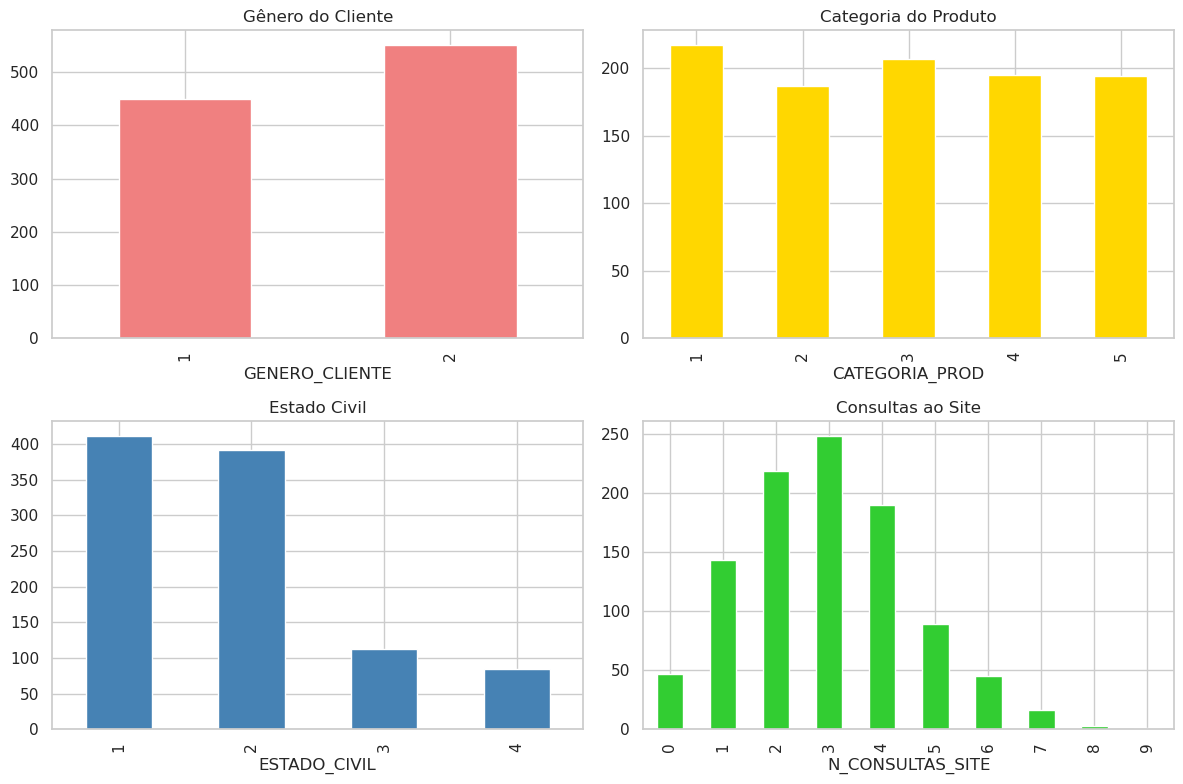

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

df['GENERO_CLIENTE'].value_counts().sort_index().plot(kind='bar', ax=axs[0, 0], color='lightcoral', title='Gênero do Cliente')
df['CATEGORIA_PROD'].value_counts().sort_index().plot(kind='bar', ax=axs[0, 1], color='gold', title='Categoria do Produto')
df['ESTADO_CIVIL'].value_counts().sort_index().plot(kind='bar', ax=axs[1, 0], color='steelblue', title='Estado Civil')
df['N_CONSULTAS_SITE'].value_counts().sort_index().plot(kind='bar', ax=axs[1, 1], color='limegreen', title='Consultas ao Site')

plt.tight_layout()
plt.show()

Explicação:

* plt.subplots(2, 2) cria uma grade de 2 linhas e 2 colunas com 4 gráficos.

* Cada subplot recebe um gráfico de frequência de uma variável.

* ax=axs[x, y] define onde cada gráfico será colocado no painel.

* tight_layout() ajusta os espaços entre os gráficos automaticamente.

Use essas explicações, tentei elaborar o roteiro para te ajudar a aplicar na base da tarefa, veja que 
a relação entre essa base com a base de produtos seria

| Original SINASC | Variável Loja    |
|------------------|------------------------|
| APGAR1           | AVALIACAO1             |
| APGAR5           | AVALIACAO2             |
| SEXO             | GENERO_CLIENTE         |
| GESTACAO         | CATEGORIA_PROD         |
| ESTCIVMAE        | ESTADO_CIVIL           |
| CONSULTAS        | N_CONSULTAS_SITE       |
